In [1]:
import pandas as pd
import math

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/jianhuitian/Documents/Programs/Anaconda3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Read in TTA DataFrame
hourly_tta = pd.read_csv(
    '/Users/jianhuitian/Documents/JianhuiTian/Work/Projects/RealTimeGapForecast/V2/Modeling/hourly_tta_t90d.csv')
hourly_tta['log_median_tta'] = hourly_tta['median_tta'].map(lambda x: math.log(x))

daily_tta = pd.read_csv(
    '/Users/jianhuitian/Documents/JianhuiTian/Work/Projects/RealTimeGapForecast/V2/Modeling/daily_tta_t90d.csv')

In [3]:
hourly_tta.head()

,zone_id,date,dow,hour,median_tta,cld_ratio,del_cld,demand,n_lfw_sessions,sd_ratio,daily_cld,log_median_tta
0,1,2021-11-23 00:00:00,2,2021-11-23 08:00:00,8.7,0.019,5.318615,273.5,313,1.144,0.01,2.163323
1,1,2021-11-23 00:00:00,2,2021-11-23 09:00:00,11.5,0.009,2.561744,271.1,381,1.405,0.01,2.442347
2,1,2021-11-23 00:00:00,2,2021-11-23 10:00:00,10.8,0.009,2.967286,345.9,408,1.180,0.01,2.379546
3,1,2021-11-23 00:00:00,2,2021-11-23 11:00:00,7.7,0.008,2.829763,336.9,487,1.446,0.01,2.041220
4,1,2021-11-23 00:00:00,2,2021-11-23 12:00:00,6.7,0.006,1.927977,338.9,426,1.257,0.01,1.902108


In [4]:
daily_tta.head()

,zone_id,date,median_tta,daily_cld
0,1,2021-11-27,6.0,0.006
1,1,2021-12-09,7.3,0.008
2,1,2021-12-15,7.1,0.008
3,1,2021-12-17,7.5,0.013
4,1,2021-12-28,6.0,0.010


In [5]:
df_hourly_tta = hourly_tta[['zone_id', 'median_tta']].groupby('zone_id').median().reset_index()
df_daily_cld = hourly_tta[['zone_id', 'date', 'daily_cld']].drop_duplicates()[['zone_id', 'daily_cld']]\
                .groupby('zone_id').median().reset_index()
df_daily_tta = daily_tta[['zone_id', 'median_tta']].groupby('zone_id').median().reset_index()\
                .rename(columns={'median_tta':'daily_median_tta'})
df_tta_targets = df_hourly_tta.merge(df_daily_cld,
                                    on=['zone_id'])
df_tta_targets = df_tta_targets.merge(df_daily_tta,
                                     on=['zone_id'])
df_tta_targets.dropna(axis=0, inplace=True)

In [6]:
df_tta_targets.head(10)

,zone_id,median_tta,daily_cld,daily_median_tta
0,1,4.90,0.0090,5.60
1,13,2.40,0.0100,2.70
2,14,2.90,0.0090,3.20
3,16,1.50,0.0060,1.40
4,18,0.90,0.0100,0.80
5,27,1.20,0.0100,1.20
6,28,1.40,0.0110,1.45
7,32,3.15,0.0165,3.15
8,33,0.60,0.0050,0.60
9,37,2.10,0.0070,2.20


In [7]:
df_tta_targets.isnull().sum()

zone_id             0
median_tta          0
daily_cld           0
daily_median_tta    0
dtype: int64

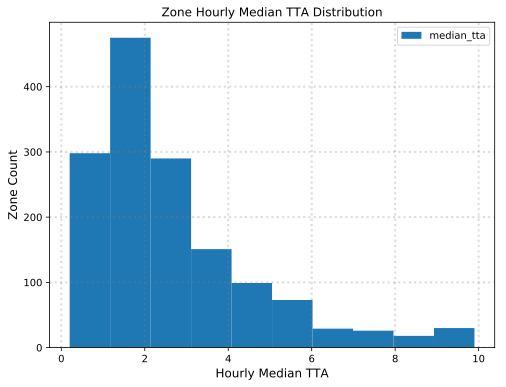

In [8]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(df_tta_targets[df_tta_targets['median_tta'] < 10.0]['median_tta'])
ax1.set_xlabel('Hourly Median TTA',fontsize=12)
ax1.set_ylabel('Zone Count',fontsize=12)
ax1.set_title('Zone Hourly Median TTA Distribution')
ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()

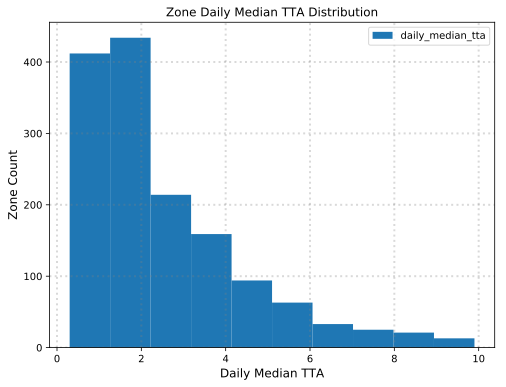

In [9]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(df_tta_targets[df_tta_targets['daily_median_tta'] < 10.0]['daily_median_tta'])
ax1.set_xlabel('Daily Median TTA',fontsize=12)
ax1.set_ylabel('Zone Count',fontsize=12)
ax1.set_title('Zone Daily Median TTA Distribution')
ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()

In [10]:
t = len(hourly_tta)
t3 = len(hourly_tta[hourly_tta['median_tta'] > 3])
print('Total hourly TTA records:')
print(t)

print('\nTotal hourly TTA records > 3.0:')
print(t3)
print('Percentange:')
print(round(t3 / t, 3))

Total hourly TTA records:
1345130

Total hourly TTA records > 3.0:
541654
Percentange:
0.403


In [11]:
zid = 975
t = len(hourly_tta[hourly_tta['zone_id'] == zid])
t3 = len(hourly_tta[(hourly_tta['zone_id'] == zid) & (hourly_tta['median_tta'] > 3)])

print('Total hourly TTA records:')
print(t)

print('\nTotal hourly TTA records > 3.0:')
print(t3)
print('Percentange:')
print(round(t3 / t, 3))

Total hourly TTA records:
709

Total hourly TTA records > 3.0:
315
Percentange:
0.444


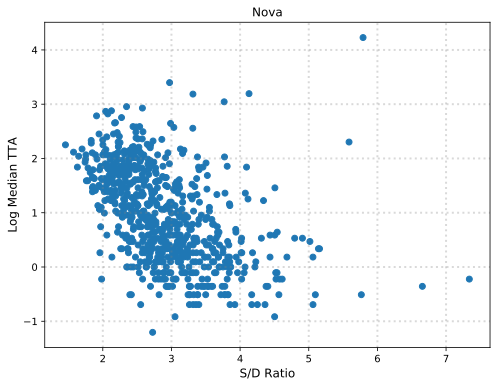

In [12]:
zones = {973: 'Brooklyn Queens',
861:'Philly',
974:'Chicago',
785:'Orange County',
942:'San Diego',
972:'West LA',
943:'Denver',
989:'St. Louis',
839:'Sacramento',
975:'Nova',
714:'Raleigh Durham',
983:'East LA'}
zid = 975

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'],
              hourly_tta[hourly_tta['zone_id'] == zid]['log_median_tta'])
ax1.set_xlabel('S/D Ratio',fontsize=12)
ax1.set_ylabel('Log Median TTA',fontsize=12)
ax1.set_title(zones[zid])
# ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()

In [13]:
hourly_tta.head()

,zone_id,date,dow,hour,median_tta,cld_ratio,del_cld,demand,n_lfw_sessions,sd_ratio,daily_cld,log_median_tta
0,1,2021-11-23 00:00:00,2,2021-11-23 08:00:00,8.7,0.019,5.318615,273.5,313,1.144,0.01,2.163323
1,1,2021-11-23 00:00:00,2,2021-11-23 09:00:00,11.5,0.009,2.561744,271.1,381,1.405,0.01,2.442347
2,1,2021-11-23 00:00:00,2,2021-11-23 10:00:00,10.8,0.009,2.967286,345.9,408,1.180,0.01,2.379546
3,1,2021-11-23 00:00:00,2,2021-11-23 11:00:00,7.7,0.008,2.829763,336.9,487,1.446,0.01,2.041220
4,1,2021-11-23 00:00:00,2,2021-11-23 12:00:00,6.7,0.006,1.927977,338.9,426,1.257,0.01,1.902108


In [14]:
# Production 
# Create Dummy DoW variables
hourly_tta = hourly_tta.join(pd.get_dummies(hourly_tta['dow'], prefix='dow'))

# S/D Ratio <= 4.5
hourly_tta = hourly_tta[hourly_tta['sd_ratio'] <= 4.5]

In [15]:
# Model for each zone
zones = {973: 'Brooklyn Queens',
861:'Philly',
974:'Chicago',
785:'Orange County',
942:'San Diego',
972:'West LA',
943:'Denver',
989:'St. Louis',
839:'Sacramento',
975:'Nova',
714:'Raleigh Durham',
983:'East LA'}
mixed_zones = [973, 861, 974, 785, 942, 972, 943, 989, 839, 975, 714, 983]
zid = 973

# Model Training
import statsmodels.api as sm
import statsmodels.formula.api as smf

# _features = ['sd_ratio', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'zone_id']
# _label = 'log_median_tta'

# Only slope random effects, assume all zones have the same intercept
# random_effects_formula = "~0 + sd_ratio + dow_1 + dow_2 + dow_3 + dow_4 + dow_5 + dow_6"

# With slope and intercept random effects
random_effects_formula = "~sd_ratio + dow_1 + dow_2 + dow_3 + dow_4 + dow_5 + dow_6"

data = hourly_tta[hourly_tta['zone_id'].isin(mixed_zones)].copy()

md = smf.mixedlm("log_median_tta ~ sd_ratio + dow_1 + dow_2 + dow_3 + dow_4 + dow_5 + dow_6", 
                 data, groups='zone_id', re_formula=random_effects_formula)
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

# Save model
mdf.save('tta_sdratio_mapping_mixedlm.pickle')

# Load model
test = sm.load('tta_sdratio_mapping_mixedlm.pickle')

if False:
    # Save to local
    if os.environ.get("LORE_ENV") == 'development':
        pickle.dump(grid,
                    open('./medley/realtime_gap_forecast/production/v1/model/' + self._filename_lr, 'wb'))

    # Save to S3
    # Save to S3
    with open(self._filename_lr, 'wb') as f:
        pickle.dump(grid, f)
    pathname = os.path.join('realtime_gap_forecast', self._filename_lr)
    lore.io.upload(self._filename_lr, pathname)
    os.remove(self._filename_lr)

    self._linear_model = grid

/Users/jianhuitian/Documents/Programs/Anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   log_median_tta
No. Observations:   11020     Method:               REML          
No. Groups:         12        Scale:                0.3596        
Min. group size:    655       Log-Likelihood:       -10097.7777   
Max. group size:    1150      Converged:            Yes           
Mean group size:    918.3                                         
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               2.905    0.123  23.576 0.000  2.663  3.146
sd_ratio               -0.830    0.077 -10.814 0.000 -0.980 -0.679
dow_1                  -0.006    0.034  -0.178 0.859 -0.072  0.060
dow_2                  -0.081    0.034  -2.361 0.018 -0.148 -0.014
dow_3                  -0.214    0.051  -4.196 0.000 -0.315 -0.114
dow_4     

/Users/jianhuitian/Documents/Programs/Anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [16]:
zid = 972
print('Slope:')
print(round(mdf.params['sd_ratio'] + mdf.random_effects[zid]['sd_ratio'], 3))
print('Intercept:')
print(round(mdf.params['Intercept'] + mdf.random_effects[zid]['zone_id'], 3))

Slope:
-1.504
Intercept:
3.483


In [17]:
mdf.random_effects[714]

zone_id    -0.411416
sd_ratio    0.158118
dow_1      -0.017211
dow_2      -0.034541
dow_3      -0.031302
dow_4      -0.052634
dow_5      -0.027431
dow_6       0.057176
dtype: float64

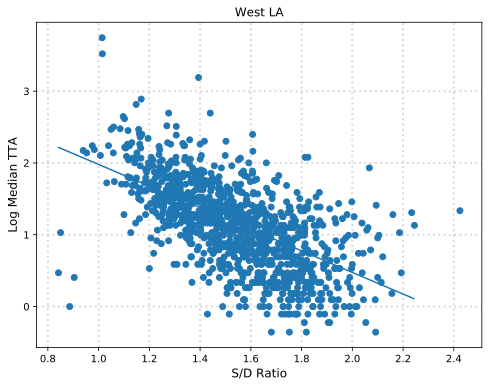

In [18]:
sd_ratio_max = hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'].max() 
sd_ratio_min = hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'].min()
_slope = round(mdf.params['sd_ratio'] + mdf.random_effects[zid]['sd_ratio'], 3)
_intercept = round(mdf.params['Intercept'] + mdf.random_effects[zid]['zone_id'], 3)
x_arr = [sd_ratio_min + 0.1 * i for i in range(int((sd_ratio_max - sd_ratio_min) / 0.1))]
y_arr = [_intercept + _slope * i for i in x_arr]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(hourly_tta[hourly_tta['zone_id'] == zid]['sd_ratio'],
              hourly_tta[hourly_tta['zone_id'] == zid]['log_median_tta'])
ax1.plot(x_arr, y_arr)
ax1.set_xlabel('S/D Ratio',fontsize=12)
ax1.set_ylabel('Log Median TTA',fontsize=12)
ax1.set_title(zones[zid])
# ax1.legend(loc='upper right')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)
plt.show()